import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [9]:
data = pd.read_csv('Viral_Social_Media_Trends.csv')
data.head(10)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
5,Post_6,Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129,Low
6,Post_7,YouTube,#Comedy,Tweet,Japan,627233,84121,97973,32648,Medium
7,Post_8,YouTube,#Gaming,Shorts,UK,2066886,317502,45222,33638,High
8,Post_9,Twitter,#Education,Live Stream,India,2169523,496078,96041,30174,Medium
9,Post_10,TikTok,#Gaming,Shorts,India,3898384,8634,69378,42700,Low


Engagement trends by region or platform

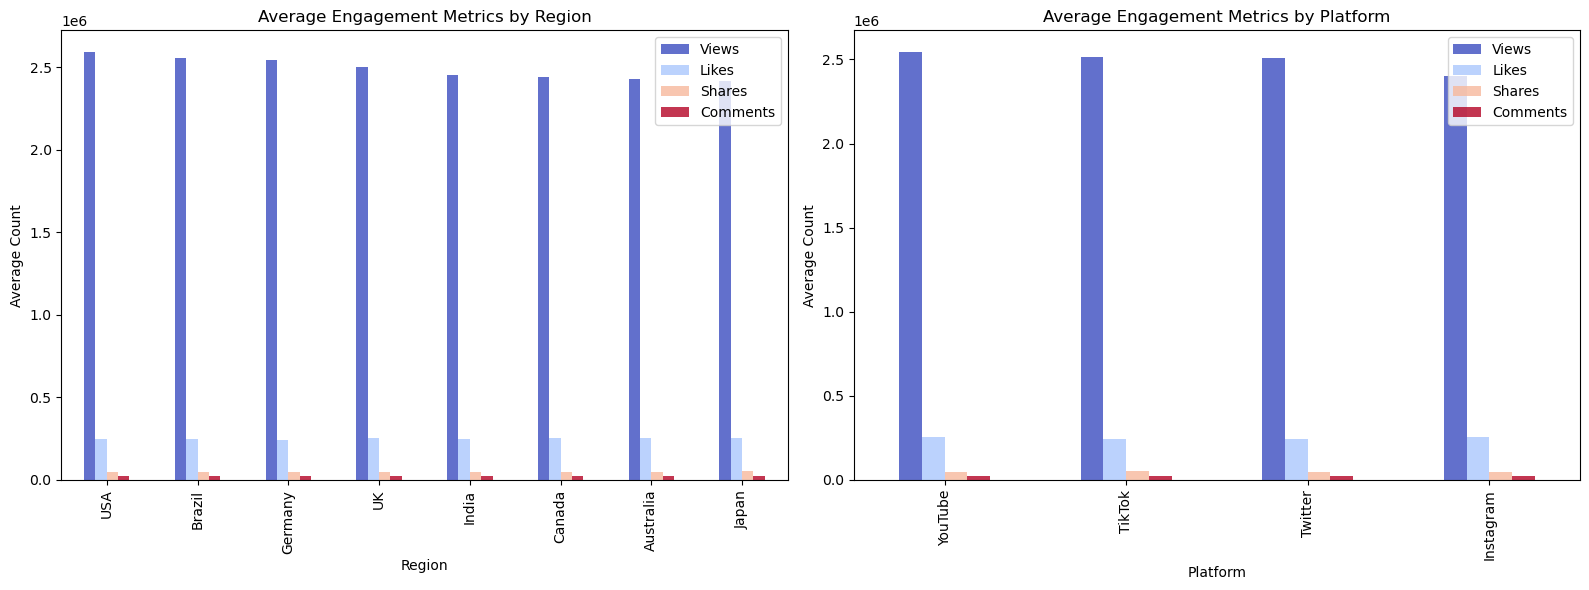

In [11]:
# Creating a DataFrame

# Aggregate engagement metrics by Region and Platform
region_engagement = data.groupby("Region")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)
platform_engagement = data.groupby("Platform")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)

# Set up visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot engagement by region
region_engagement.plot(kind="bar", ax=axes[0], cmap="coolwarm", alpha=0.8)
axes[0].set_title("Average Engagement Metrics by Region")
axes[0].set_ylabel("Average Count")
axes[0].set_xlabel("Region")

# Plot engagement by platform
platform_engagement.plot(kind="bar", ax=axes[1], cmap="coolwarm", alpha=0.8)
axes[1].set_title("Average Engagement Metrics by Platform")
axes[1].set_ylabel("Average Count")
axes[1].set_xlabel("Platform")

plt.tight_layout()
plt.show()


Here are the engagement trends by region and platform:

Regions: Some regions receive significantly more views, likes, shares, and comments than others. This might indicate differences in audience behavior or platform penetration.
Platforms: Certain platforms generate higher engagement metrics on average, showing which social media sites are most effective for viral content.

Hashtag popularity

C:\Users\lilia\AppData\Local\Temp\ipykernel_19220\2039411850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette="viridis")


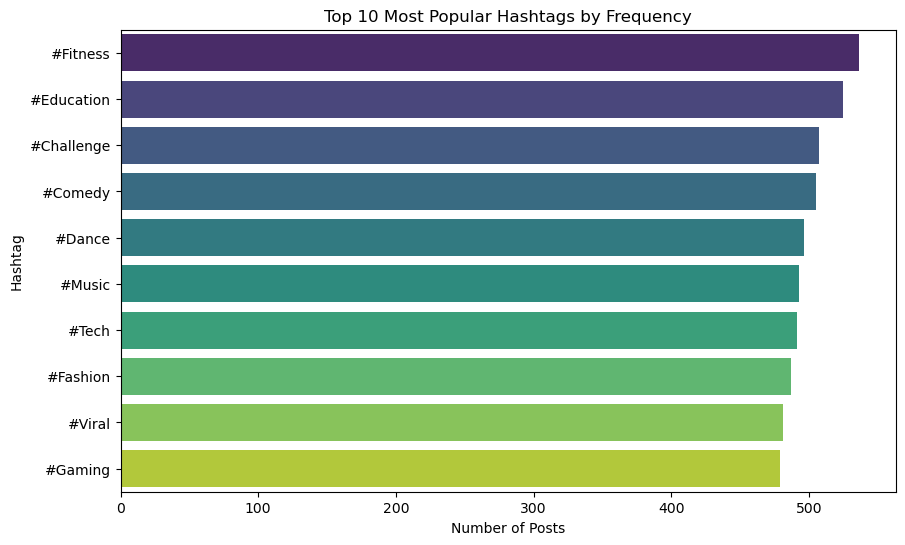

In [31]:
# Count the top 10 most popular hashtags based on occurrences in the dataset
top_hashtags = data["Hashtag"].value_counts().nlargest(10)

# Set up visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette="viridis")
plt.title("Top 10 Most Popular Hashtags by Frequency")
plt.xlabel("Number of Posts")
plt.ylabel("Hashtag")
plt.show()


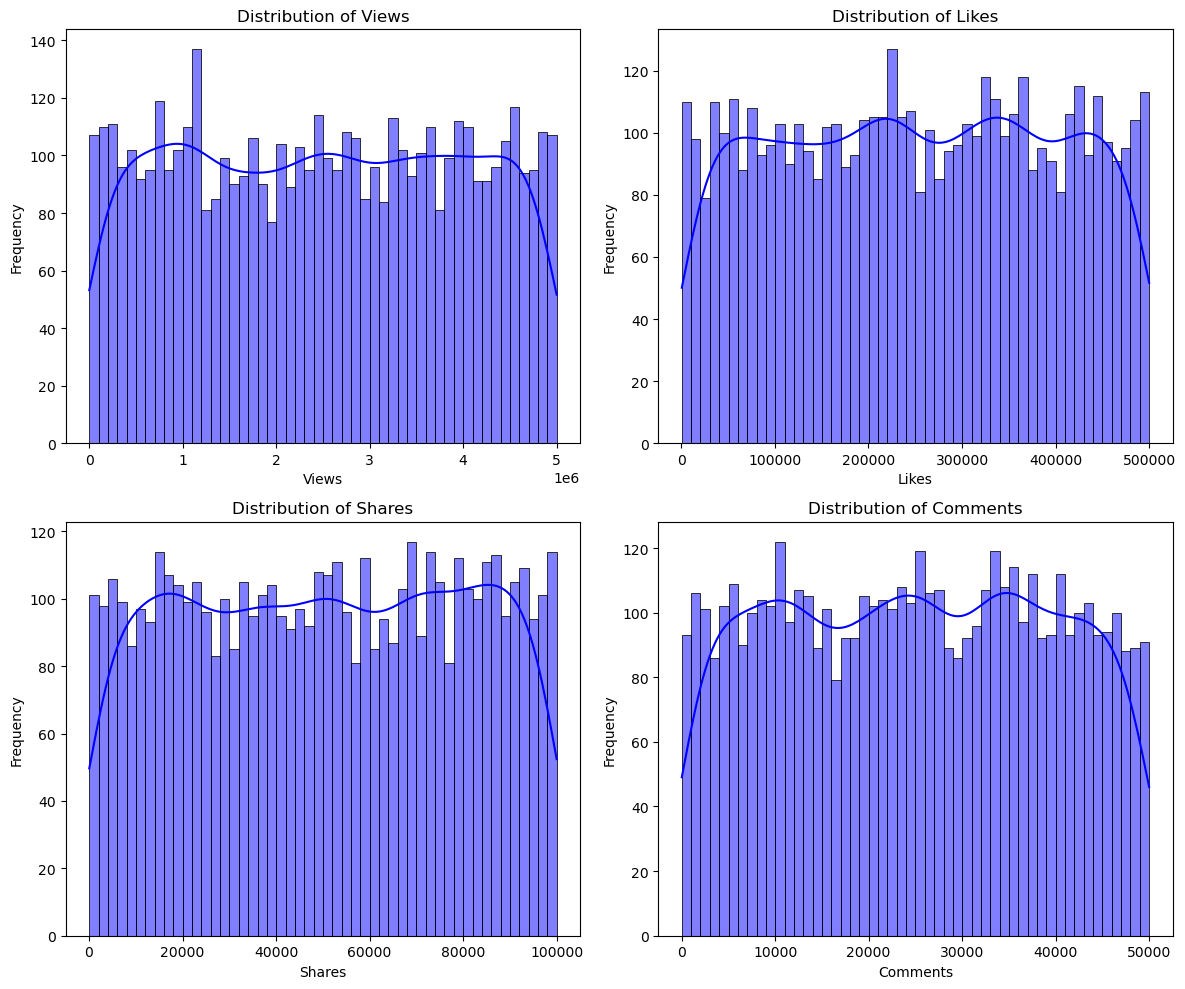

(              Views          Likes        Shares      Comments
 count  5.000000e+03    5000.000000   5000.000000   5000.000000
 mean   2.494066e+06  251475.029800  50519.562000  24888.393800
 std    1.459490e+06  144349.583384  29066.362671  14284.504319
 min    1.266000e+03     490.000000     52.000000     18.000000
 25%    1.186207e+06  126892.250000  25029.000000  12305.250000
 50%    2.497373e+06  249443.000000  50839.500000  25004.000000
 75%    3.759781e+06  373970.750000  75774.250000  37072.750000
 max    4.999430e+06  499922.000000  99978.000000  49993.000000,
                   Views          Likes        Shares      Comments
 Platform                                                          
 YouTube    2.545648e+06  258314.002266  50073.091390  25321.390483
 TikTok     2.515015e+06  244206.719841  51468.256349  24778.696825
 Twitter    2.506005e+06  245880.118771  50227.750831  24456.857143
 Instagram  2.404080e+06  257118.217822  50310.909241  24958.113861,
              

In [37]:
# Summary statistics for engagement metrics
summary_stats = data[["Views", "Likes", "Shares", "Comments"]].describe()

# Distribution of engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ["Views", "Likes", "Shares", "Comments"]

for ax, metric in zip(axes.flatten(), metrics):
    sns.histplot(data[metric], bins=50, kde=True, ax=ax, color="blue")
    ax.set_title(f"Distribution of {metric}")
    ax.set_xlabel(metric)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Top-performing platforms by average engagement
platform_engagement = data.groupby("Platform")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)

# Top content types by average engagement
content_engagement = data.groupby("Content_Type")[["Views", "Likes", "Shares", "Comments"]].mean().sort_values("Views", ascending=False)

# Most engaging hashtags (based on average likes)
top_hashtags = data.groupby("Hashtag")[["Likes"]].mean().nlargest(10, "Likes")

summary_stats, platform_engagement, content_engagement, top_hashtags


Data Analysis Insights:
Summary Statistics:

Average views: ~2.49 million (range: 1,266 to 4.99 million).
Average likes: ~251,475 (range: 490 to 499,922).
Average shares: ~50,519.
Average comments: ~24,888.
There is a wide spread in engagement values, indicating high variability.

Engagement by Platform (Average Views, Likes, Shares, Comments):
YouTube leads slightly in average engagement metrics.
TikTok, Twitter, and Instagram follow closely behind with similar engagement.
Engagement by Content Type:

Reels receive the highest average engagement.
Tweets, Videos, Shorts, and Live Streams have similar performance.
Posts have the lowest average engagement.
Top 10 Most Engaging Hashtags (Based on Average Likes):

#Education, #Tech, #Dance, and #Comedy lead in average likes.
Other popular hashtags include #Fitness, #Fashion, #Viral, #Music, #Gaming, and #Challenge.